# Анализ и кластеризация стран


Источник данных: все данные былы созданы на основе данных следующего источника: 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Цель: 

### Найти похожие между собой страны и регионы, экспериментируя с различным количеством кластеров. <br><br> Что означают полученные кластеры? <br><br> *Замечание: в этой задаче нет 100% правильных ответов, в видео-лекции мы обсуждаем один из вариантов интерпретации результатов.*

----

## Импорт библиотек и загрузка данных

**Задание: Запустите ячейки ниже для импорта библиотек и загрузки данных из файла в датайфрейм Pandas.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/CIA_Country_Facts.csv')

## Исследование данных (Exploratory Data Analysis)

**Задание: посмотрите на строки и колонки в данных, в том числе на типы данных для колонок.**

In [7]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.000,437624.00000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.000,4647.50000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.000,29.15000,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.000,0.10000,0.730,1.034500e+01,8.706600e+02
Net migration,224.0,3.812500e-02,4.889269e+00,-20.990,-0.92750,0.000,9.975000e-01,2.306000e+01
Infant mortality (per 1000 births),224.0,3.550696e+01,3.538990e+01,2.290,8.15000,21.000,5.570500e+01,1.911900e+02
GDP ($ per capita),226.0,9.689823e+03,1.004914e+04,500.000,1900.00000,5550.000,1.570000e+04,5.510000e+04
Literacy (%),209.0,8.283828e+01,1.972217e+01,17.600,70.60000,92.500,9.800000e+01,1.000000e+02
Phones (per 1000),223.0,2.360614e+02,2.279918e+02,0.200,37.80000,176.200,3.896500e+02,1.035600e+03
Arable (%),225.0,1.379711e+01,1.304040e+01,0.000,3.22000,10.420,2.000000e+01,6.211000e+01


In [14]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

# Визуализация данных

Давайте построим некоторые графики для визуализации данных. Кроме предложенных графиков ниже, Вы также можете создать любые дополнительные визуализации данных, которые покажутся Вам интересными!

**Задание: постройте гистограмму для колонки Population.**

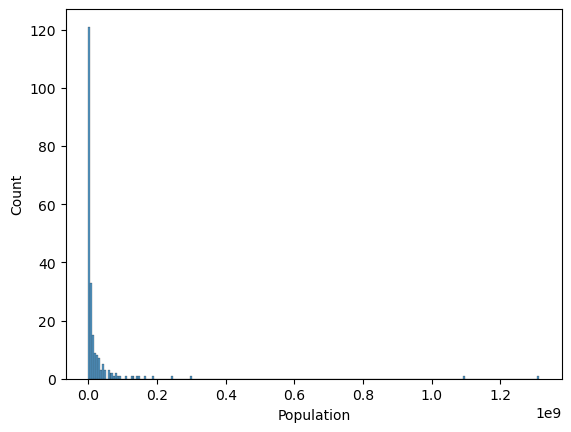

In [23]:
sns.histplot(data=df, x='Population');

**Задание: Вы заметите, что гистограмма очень перекошена из-за нескольких очень больших стран. Поменяйте график таким образом, чтобы показывать только страны с населением меньше 0.5 миллиарда людей.**

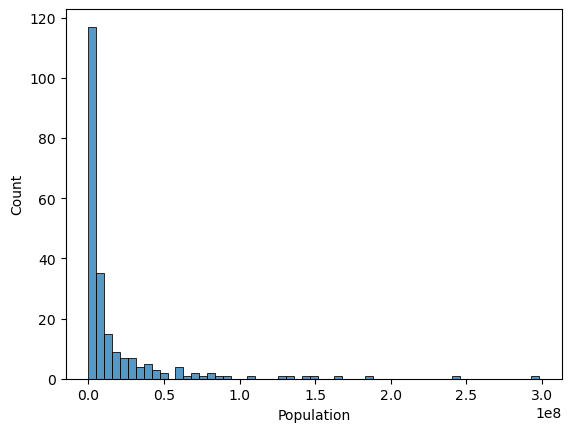

In [35]:
sns.histplot(data=df[df['Population'] < 0.5 * 10**9], x='Population');


**Задание: далее исследуем GDP (ВВП - Валовый Внутренний Продукт) и регионы (Regions). Постройте график barchart, на котором изобразите среднее ВВП на душу населения (GDP per Capita) для каждого региона.**

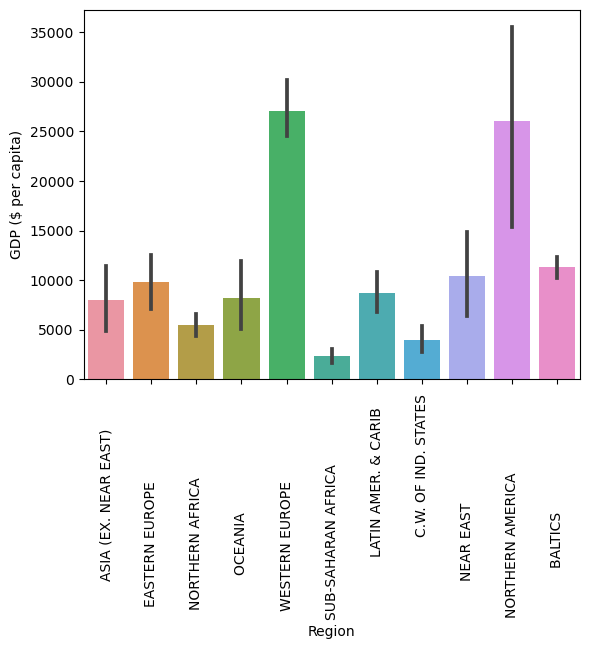

In [38]:
sns.barplot(data=df, x='Region', y='GDP ($ per capita)')
plt.xticks(rotation=90);

**Задание: Постройте график scatterplot для визуализации связи между колонками "кол-во телефонов на одну тысячу человек" и "ВВП на душу населения". Раскрасьте этот график разными цветами по колонке Region.**

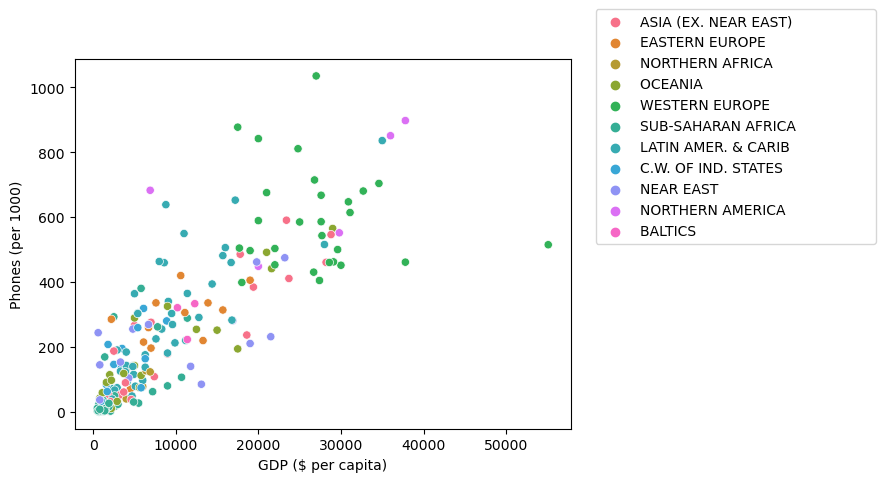

In [44]:
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Phones (per 1000)', hue='Region')
plt.legend(loc=(1.05,0.5));

**Задание: Постройте график scatterplot для колонок "GDP per Capita" и "Literacy" (раскрасьте график по колонке Region). Какие выводы можно сделать из этого графика?**

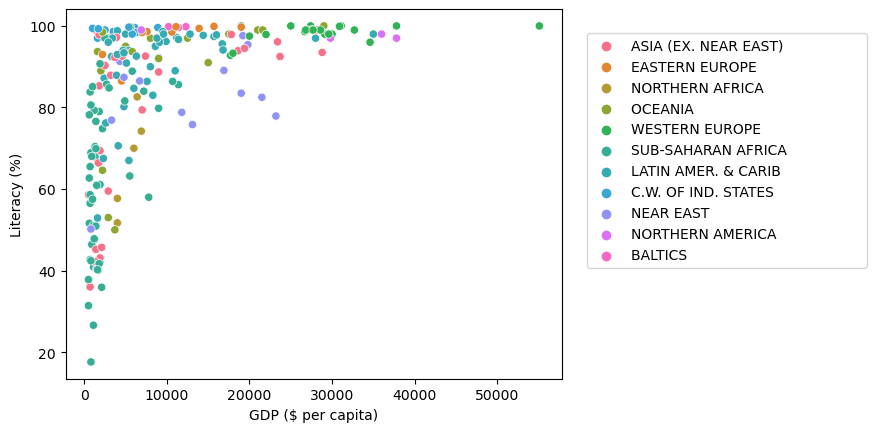

In [53]:
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Literacy (%)', hue='Region')
plt.legend(loc=(1.05, 0.3));

**Задание: Постройте тепловую карту Heatmap для корреляций между колонками в датафрейме.**

<Axes: >

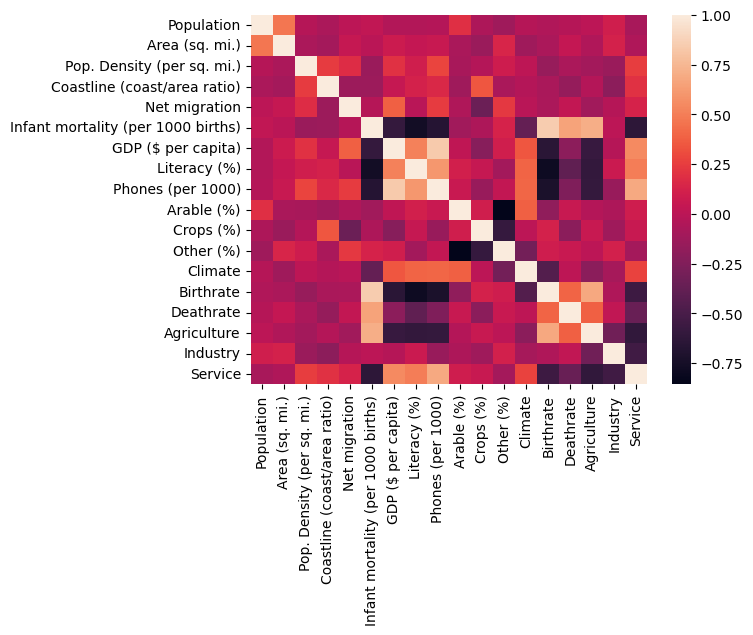

In [55]:
sns.heatmap(data=df.corr(numeric_only=True));

**Задание: Seaborn может автоматически выполнять иерархическую кластеризацию данных с помощью функции clustermap(). Постройте график clustermap для корреляций между колонками датафрейма.**

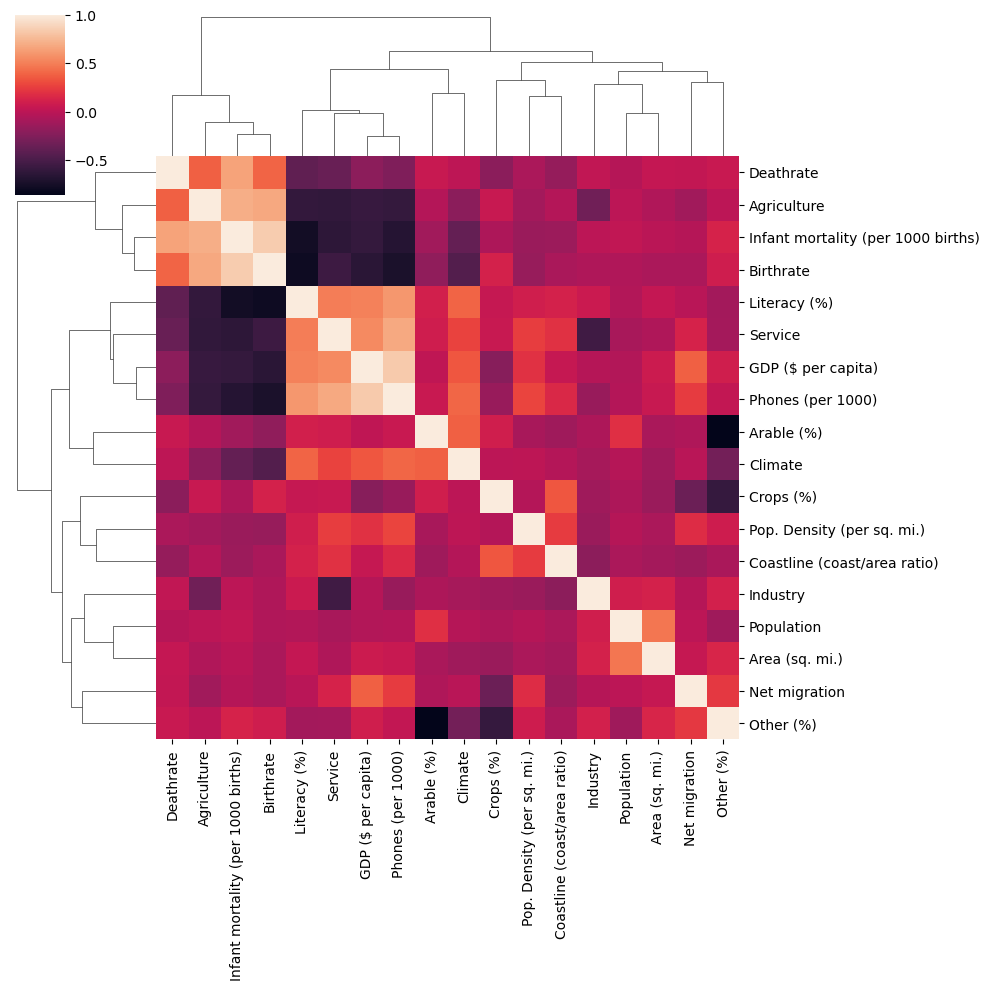

In [62]:
sns.clustermap(data=df.corr(numeric_only=True));

-----

## Подготовка данных и модель данных

Давайте подготовим наши данные для кластеризации с помощью метода К-средних!

### Отсутствующие данные (Missing Data)

**Задание: Постройте отчёт - сколько строк имеют отсутствующие значения в той или иной колонке.**

In [67]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

**Задание: Для каких стран в колонке Agriculture значения NaN? Что эти страны имеют общего между собой?**

In [70]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**Задание: Вы наверняка заметили, что большинство этих стран являются маленькими островами, кроме Гринландии и Западной Сахары. Замените для этих стран отсутствующие значения нулями, потому что это очень маленькие страны. У Вас должно получиться 15 таких стран. В качестве подсказки вспомните, что мы можем применять вот такой синтаксис:**

    df[df['feature'].isnull()]
    

In [77]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

**Задание: Проверьте заново, в каких колонках сколько строк имеют неопределённые значения:**

In [78]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**Задание: Обратите внимание, что колонка "climate" пустая для нескольких стран. Но для всех стран заполнена колонка Region! Пользуясь этим, замените отсутствующие значения колонки Climate на средние значения этой колонки, где усреднение выполняется для соответствующего региона.**

Подсказка о том, как это можно сделать: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


In [85]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))


**Задание: Проверьте заново, сколько теперь отсутствующих значений.**

In [86]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**Задание: Для колонки "Literacy percentage" примените такой же метод, что и ранее для колонки Climate. Замените отсутствующие значения колонки Literacy % на средние значения этой колонки для соответствующего региона.**

In [88]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

**Задание: Проверьте заново, сколько теперь отсутствующих значений.**

In [90]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

**Задание (Опционально): Теперь данные отсутствуют только для нескольких стран. Либо удалите такие страны, ИЛИ обработайте эти отсутствующие значения по какой-либо выбранной Вами методологии. Чтобы сэкономить Ваше время, мы удалим эти страны.**

In [91]:
df = df.dropna()

## Подготовка данных с признаками

**Задание: пришло время подготовить данные для кластеризации. Колонка Country является уникальным идентификатором, поэтому эта колонка не будет полезной для кластеризации, поскольку она содержит уникальные значения для каждой строки. При создании датафрейма с наборами признаков X удалите эту колонку Country.**

In [94]:
from sklearn.model_selection import train_test_split
X = df.drop('Country', axis=1)

**Задание: Создайте набор признаков X, причём колонка Region всё ещё является категориальной, поэтому для этой колонки создайте дамми-переменные с помощью Pandas.**

In [96]:
X = pd.get_dummies(data=X)

In [98]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


### Масштабирование данных

**Задание: Поскольку некоторые колонки измеряются в процентах, а некоторые в абсолютных значениях, то выполните масштабирование признаков с помощью Sklearn.**

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [101]:
scaled_X = scaler.fit_transform(X)

In [102]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

### Создание и обучение модели Kmeans




**Задание: Напишите цикл for для создания и обучения нескольких моделей KMeans, проверяя количество кластеров K от 2 до 30. На каждом шаге цикла сохраняйте сумму квадратов расстояний от точек до центров кластеров (SSD - Sum of Squared Distances) для каждого значения K. Далее нанесите эти данные на график, изображая метрику SSD для различных значений К. Опционально: также можно построить график barplot с изменениями метрики SSD.**

In [104]:
from sklearn.cluster import KMeans

In [105]:
ssd = []

for k in range(2, 30):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    ssd += [model.inertia_]
    

C:\Users\gzolo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gzolo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gzolo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gzolo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\gzolo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gzolo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gzolo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gzolo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

Text(0, 0.5, 'SSD')

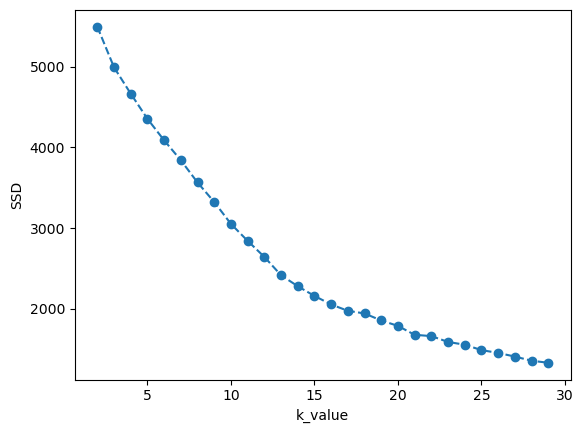

In [110]:
plt.plot(range(2, 30), ssd, 'o--');
plt.xlabel('k_value')
plt.ylabel('SSD')

<Axes: >

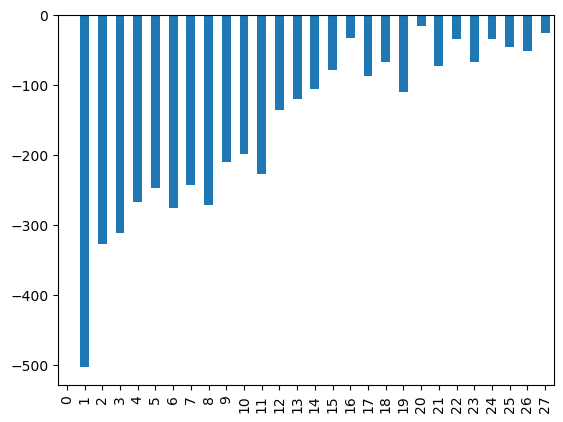

In [112]:
pd.Series(ssd).diff().plot(kind='bar')

-----

# Интерпретация модели


**Задание: Какое значение K может быть хорошим выбором? Возможно таких значений несколько? Какие признаки влияют на формирование этих кластеров? Поскольку это обучение без учителя (unsupervised learning), здесь нет на 100% правильного ответа. Можете посмотреть видео-лекцию с решениями, где мы обсуждаем эту тему.**

In [113]:
# Выберите K на основе метода локтя, а также посмотрите какие признаки влияют на создение кластеров!

# Помните, здесь нет на 100% правильного ответа!

-----


#### Пример: выбираем K=3

**Можно сказать, что в точке K=3 падение метрики SSD более пологое (хотя метрика продолжает уменьшаться после этой точки). Как может выглядеть картина для K=3? Давайте посмотрим, какие признаки являются важными в случае 3 кластеров!**

In [115]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

C:\Users\gzolo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gzolo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [116]:
model.labels_

array([2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2,
       0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 2,
       0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2])

In [117]:
X['K=3 clusters'] = model.labels_

In [118]:
X.corr()['K=3 clusters'].sort_values()

Phones (per 1000)                            -0.766743
GDP ($ per capita)                           -0.729068
Literacy (%)                                 -0.572784
Region_WESTERN EUROPE                        -0.513513
Climate                                      -0.424025
Service                                      -0.418007
Region_EASTERN EUROPE                        -0.291644
Arable (%)                                   -0.235304
Pop. Density (per sq. mi.)                   -0.195150
Region_BALTICS                               -0.164974
Net migration                                -0.161335
Region_NORTHERN AMERICA                      -0.125579
Coastline (coast/area ratio)                 -0.081488
Region_LATIN AMER. & CARIB                   -0.042016
Region_OCEANIA                               -0.031301
Region_ASIA (EX. NEAR EAST)                  -0.022972
Region_C.W. OF IND. STATES                   -0.017977
Region_NEAR EAST                             -0.013713
Area (sq. 